# Image Classification using Convolutional Neural Network (CNN) with Keras

In [126]:
!pip install keras tensorflow

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [127]:
import os

import cv2
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

## Loading Images

In [128]:
%matplotlib inline

In [129]:
image_paths = list(paths.list_images('datasets/animals'))

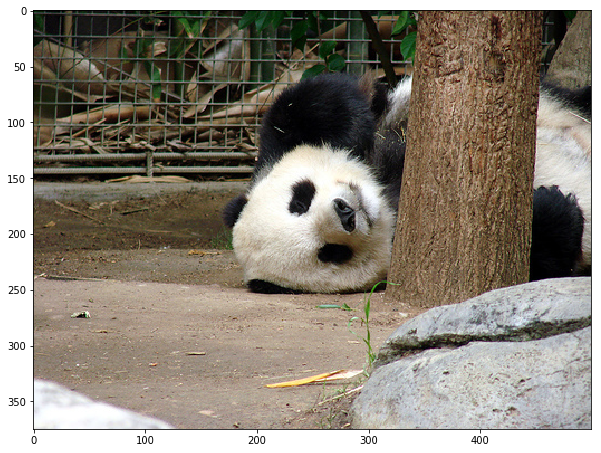

In [130]:
image = cv2.imread(image_paths[2500])

plt.figure(figsize=(10, 10))
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [131]:
data = []
labels = []

**Note:** Machine learning models take a *fixed size input*.

In [132]:
from keras.preprocessing.image import img_to_array

In [133]:
for image_path in image_paths:
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-2]
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    image = img_to_array(image, data_format='channels_first')
    data.append(image)
    labels.append(label)

In [134]:
data = np.array(data)
labels = np.array(labels)

Normalize images to the range [0, 1].

In [135]:
data = data.astype('float') / 255.0

In [136]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense, Flatten
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [137]:
le = LabelBinarizer()

In [138]:
labels = le.fit_transform(labels)

In [139]:
labels

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [140]:
le.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=30)

## Building a NN Model

In [142]:
# Keras uses "channels first".
input_shape = (3, 32, 32)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [143]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy']
)

In [144]:
model.fit(
    X_train, 
    y_train, 
    epochs=100,
    validation_data=(X_test, y_test),
    batch_size=128
)

Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 1s 338us/step - loss: 1.0767 - acc: 0.3822 - val_loss: 1.0302 - val_acc: 0.4693
Epoch 2/100
2250/2250 [==============================] - 0s 195us/step - loss: 1.0031 - acc: 0.5076 - val_loss: 0.9667 - val_acc: 0.5027
Epoch 3/100
2250/2250 [==============================] - 0s 180us/step - loss: 0.9568 - acc: 0.5213 - val_loss: 0.9298 - val_acc: 0.5347
Epoch 4/100
2250/2250 [==============================] - 0s 177us/step - loss: 0.9302 - acc: 0.5360 - val_loss: 0.9431 - val_acc: 0.5067
Epoch 5/100
2250/2250 [==============================] - 0s 184us/step - loss: 0.9109 - acc: 0.5578 - val_loss: 0.8985 - val_acc: 0.5480
Epoch 6/100
2250/2250 [==============================] - 0s 190us/step - loss: 0.8976 - acc: 0.5613 - val_loss: 0.8938 - val_acc: 0.5427
Epoch 7/100
2250/2250 [==============================] - 0s 181us/step - loss: 0.8914 - acc: 0.5609 - val_loss: 0.8805 - val_acc: 0

Epoch 60/100
2250/2250 [==============================] - 0s 208us/step - loss: 0.7311 - acc: 0.6613 - val_loss: 0.7979 - val_acc: 0.5907
Epoch 61/100
2250/2250 [==============================] - 0s 191us/step - loss: 0.7207 - acc: 0.6827 - val_loss: 0.8126 - val_acc: 0.5880
Epoch 62/100
2250/2250 [==============================] - 0s 192us/step - loss: 0.7122 - acc: 0.6920 - val_loss: 0.8074 - val_acc: 0.6027
Epoch 63/100
2250/2250 [==============================] - 0s 177us/step - loss: 0.7146 - acc: 0.6684 - val_loss: 0.8291 - val_acc: 0.5987
Epoch 64/100
2250/2250 [==============================] - 0s 182us/step - loss: 0.7175 - acc: 0.6707 - val_loss: 0.7956 - val_acc: 0.5960
Epoch 65/100
2250/2250 [==============================] - 0s 184us/step - loss: 0.7103 - acc: 0.6822 - val_loss: 0.8014 - val_acc: 0.5973
Epoch 66/100
2250/2250 [==============================] - 0s 178us/step - loss: 0.7059 - acc: 0.6884 - val_loss: 0.8061 - val_acc: 0.5973
Epoch 67/100
2250/2250 [==========

In [145]:
y_pred = model.predict(X_test)

In [146]:
print(classification_report(
    y_test.argmax(axis=1), 
    y_pred.argmax(axis=1), 
    target_names=le.classes_
))

             precision    recall  f1-score   support

       cats       0.61      0.16      0.25       271
       dogs       0.42      0.75      0.54       239
      panda       0.77      0.82      0.79       240

avg / total       0.60      0.56      0.52       750

